# Proyek Analisis Data: Nama dataset
- Nama: Murfid Aqil
- Email: murfidaqil8@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda pada tahun 2011-2012
- Tipe pengguna dalam menyewa sepeda dan bagaimana persentasenya?

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Menyiapkan seluruh library yang dibutuhkan

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

In [3]:
import zipfile
local_zip = '/content/drive/MyDrive/Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

**DAY**

In [4]:
#Read CSV and display the data
day = pd.read_csv('/content/day.csv')
display(day)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**HOUR**

In [6]:
hour = pd.read_csv('/content/hour.csv')
display(hour)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

**DATA DAY**

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day.duplicated().sum()

0

In [9]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**DATA HOUR**

In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour.duplicated().sum()

0

In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**DATA DAY**

In [13]:
day['dteday']=pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Melakukan rename pada kolom dataset, agar data dapat lebih mudah dimengerti

In [14]:
day.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'temp':'temperature',
    'hum':'hummadity',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
},inplace=True)

- Melakukan konversi data pada kolom year, di mana sebelumnya angka 0 merepresentasikan tahun 2011 dan angka 1 merepresentasikan tahun 2012

In [16]:
def change_year(x):
  if x==0:
    return 2011
  else:
    return 2012
day['year'] = day['year'].apply(change_year)
day.head()


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


-Melakukan konversi data pada kolom season, di mana sebelumnya angka 1 merepresentasikan Springer, 2 merepresentasikan Summer, 3 merepresentasikan Fall dan angka 4 merepresentasikan Winter

In [17]:
def change_season(x):
    if x == 1:
        return 'Springer'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Melakukan konversi data pada kolom season, di mana sebelumnya angka 1 merepresentasikan Clear & Cloudly, 2 merepresentasikan Mist, 3 merepresentasikan Light Snow dan angka 4 Heavy rain

In [18]:

def change_weather(x):
    if x == 1:
        return 'Clear & Cloudy'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light snow'
    else:
        return 'Heavy rain'

day['weathersit'] = day['weathersit'].apply(change_weather)
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,Clear & Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,Clear & Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,Clear & Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Melakukan konversi kolom weekday yang sebelumnya direpresentasikan dengan angka menjadi nama-nama hari dalam 1 minggu

In [19]:
day_convert={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
day['weekday']=day['weekday'].map(day_convert)
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,Tuesday,1,Clear & Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,Wednesday,1,Clear & Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,Thursday,1,Clear & Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Melakukan konversi kolom month yang sebelumnya direpresentasikan dengan angka menjadi nama-nama hari dalam 1 tahun

In [20]:

month_convert={
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
day['month']=day['month'].map(month_convert)
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Tuesday,1,Clear & Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Wednesday,1,Clear & Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Thursday,1,Clear & Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**DATA HOUR**

- Mengubah tipe data dteday. Karena kolom dteay memiliki tipe data yang kurang sesuai yaitu object, oleh karena itu kolom dteday harus diubah menjadi tipe data date time

In [21]:

hour['dteday']=pd.to_datetime(hour['dteday'])
hour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Melakukan rename pada kolom dataset, agar data dapat lebih mudah dimengerti

In [22]:
hour.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'temp':'temperature',
    'hum':'hummadity',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
},inplace=True)

- Melakukan konversi data pada kolom year, di mana sebelumnya angka 0 merepresentasikan tahun 2011 dan angka 1 merepresentasikan tahun 2012

In [23]:

def change_year(x):
  if x==0:
    return 2011
  else:
    return 2012
hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Melakukan konversi data pada kolom season, di mana sebelumnya angka 1 merepresentasikan Springer, 2 merepresentasikan Summer, 3 merepresentasikan Fall dan angka 4 merepresentasikan Winter

In [24]:
def change_season(x):
    if x == 1:
        return 'Springer'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

hour['season'] = hour['season'].apply(change_season)
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Melakukan konversi data pada kolom season, di mana sebelumnya angka 1 merepresentasikan Clear & Cloudly, 2 merepresentasikan Mist, 3 merepresentasikan Light Snow dan angka 4 Heavy rain

In [25]:
def change_weather(x):
    if x == 1:
        return 'Clear & Cloudy'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light snow'
    else:
        return 'Heavy rain'

hour['weathersit'] = hour['weathersit'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,0,6,0,Clear & Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,0,1,1


- Melakukan konversi kolom weekday yang sebelumnya direpresentasikan dengan angka menjadi nama-nama hari dalam 1 minggu

In [26]:

hour['weekday']=hour['weekday'].map(day_convert)
hour.head()


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,1,0,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,Sunday,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,Sunday,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,0,1,1


- Melakukan konversi kolom month yang sebelumnya direpresentasikan dengan angka menjadi nama-nama hari dalam 1 tahun

In [27]:

hour['month']=hour['month'].map(month_convert)
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Springer,2011,January,0,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Sunday,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Sunday,0,Clear & Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Sunday,0,Clear & Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data Day

In [28]:
day.describe(include='all')

<ipython-input-28-6b915255483d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include='all')


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,NaN,Sunday,NaN,Clear & Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan data di atas, dapat dilihat pengguna menyewa paling banyak pada musim fall

**Pengguna Berdasarkan Musim**

In [29]:
day.groupby(by='season').agg({
    'casual_users':'sum',
    'registered_users':'sum',
    'total_users':'sum'
})

,casual_users,registered_users,total_users
season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Berdasarkan data tersebut, pengguna paling banyak menyewa pada musim Fall dengan total pengguna sebanyak 1,061,129

**Pengguna Berdasarkan Cuaca**

In [30]:
day.groupby(by='weathersit').agg({
    'casual_users':'sum',
    'registered_users':'sum',
    'total_users':'sum'
})

,casual_users,registered_users,total_users
weathersit,,,
Clear & Cloudy,446346,1811606,2257952
Light snow,3895,33974,37869
Mist,169776,827082,996858


Berdasarkan data tersebut, pengguna paling banyak menyewa pada kondisi cuaca Clear & Cloudy dengan total pengguna sebanyak 2,257,952

**Pengguna Berdasarkan Hari**

In [31]:
day.groupby(by='weekday').agg({
    'casual_users':'sum',
    'registered_users':'sum',
    'total_users':'sum'
})

,casual_users,registered_users,total_users
weekday,,,
Friday,61460,423935,485395
Monday,140521,303506,444027
Saturday,78238,409552,487790
Sunday,153852,323955,477807
Thursday,57319,415729,473048
Tuesday,70784,384719,455503
Wednesday,57843,411266,469109


Berdasarkan data tersebut, pengguna paling banyak menyewa pada hari Sabtu dengan total pengguna sebanyak 487,790

**Eksplorasi Data Hour**

DATA HOUR

In [33]:
hour.describe(include='all')

<ipython-input-33-6d0f8fb4e7de>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour.describe(include='all')


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hummadity,windspeed,casual_users,registered_users,total_users
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,NaN,Sunday,NaN,Clear & Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [34]:
hour.groupby(by=["season", "weathersit"]).agg({
    "date": "nunique",
    "casual_users": "sum",
    "registered_users": "sum",
    'total_users':'sum'
})

date  casual_users  registered_users  total_users
season   weathersit                                                       
Fall     Clear & Cloudy   183        174014            627927       801941
         Light snow        72          9727             36529        46256
         Mist             140         42350            170582       212932
Springer Clear & Cloudy   174         44462            280816       325278
         Heavy rain         3             8               215          223
         Light snow        75          1392             20250        21642
         Mist             146         14760            109445       124205
Summer   Clear & Cloudy   177        151197            513266       664463
         Light snow        91          7413             39350        46763
         Mist             146         44912            162451       207363
Winter   Clear & Cloudy   166         93072            453419       546491
         Light snow        62          4251             39419        43670
         Mist             135         32459            218993       251452

Berdasarkan data tersebut, pengguna paling banyak melakukan penyewaan pada musim Fall dan dengan kondisi cuaca Clear & Cloudy sebanyak 801,941. Sedangkan pengguna paling sedikit melakukan penyewaan pada musim springer dengan kondisi cuaca heavy rain dengan total pengguna 233.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012

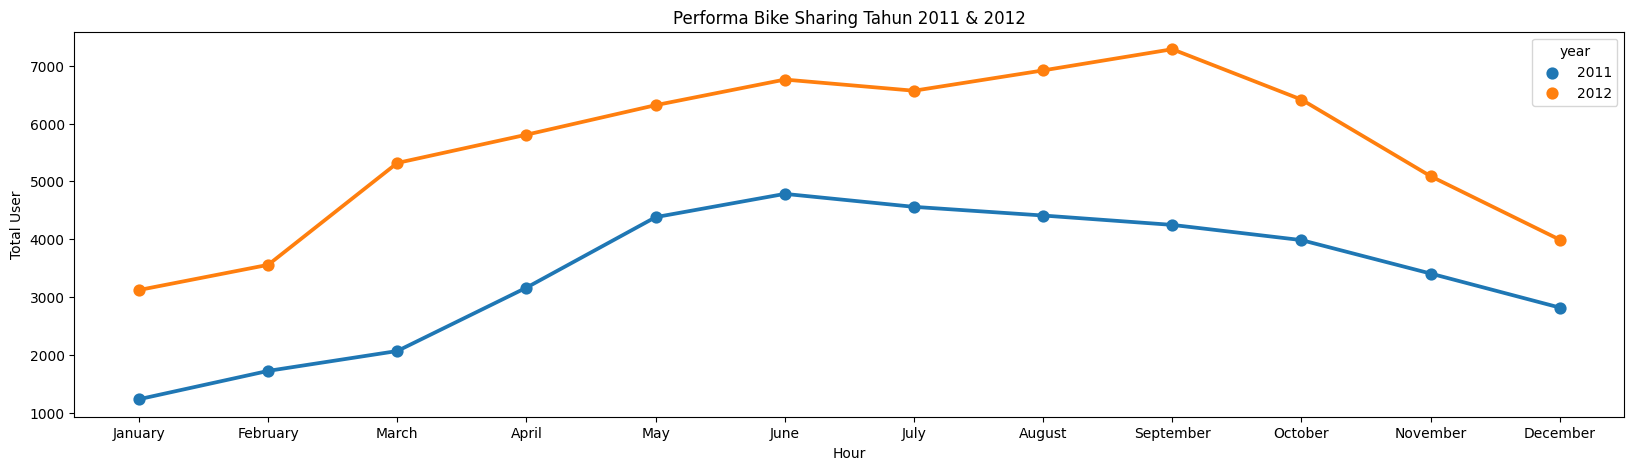

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day, x='month', y='total_users', hue='year', errorbar=None, ax=ax)
ax.set(title='Performa Bike Sharing Tahun 2011 & 2012')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

Berdasarkan grafik di atas, dari tahun 2011 hingga tahun 2012 pengguna BIke Sharing mengalami kenaikan.

1. Pada tahun 2012 bulan Juli hingga September pengguna Bike Sharing terus
mengalami kenaikan di mana Bike Sharing paling diminati oleh pengguna pada bulan September pada tahun tersebut

2. Pada tahun 2011 bulan Maret hingga Juni pengguna Bike Sharing terus
mengalami kenaikan di mana Bike Sharing paling diminati oleh pengguna pada bulan Juni pada tahun tersebut

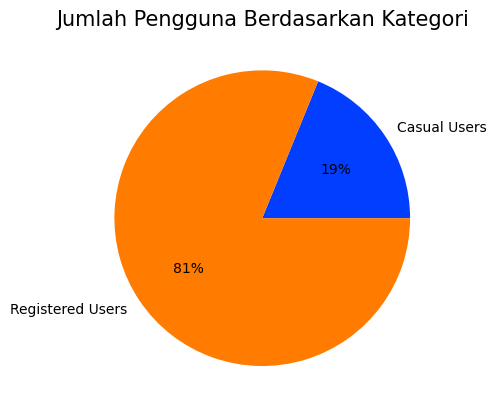

In [41]:

categories=['Casual Users','Registered Users']
sum_casual=day['casual_users'].sum()
sum_registered=day['registered_users'].sum()
totals = [sum_casual, sum_registered]


colors = sns.color_palette('bright')[0:4]
plt.pie(totals, labels=categories, colors=colors, autopct='%.0f%%')
plt.title("Jumlah Pengguna Berdasarkan Kategori", loc="center", fontsize=15)
plt.show()

Berdasarkan grafik tersebut, pengguna Bike Sharing terbagi menjadi 2 tipe yaitu Registered Users dan Casual Users. Sebanyak 81% penyewa merupakan pelanggan yang terregistrasi dan sebanyak 19% merupakan pelanggan yang tidak ter registrasi

### Pertanyaan 2: Pada kondisi cuaca bagaimana pelanggan paling banyak menyewa sepeda?

In [42]:
season_casual_users=day.groupby('season').casual_users.sum().sort_values(ascending=False).reset_index()
season_casual_users


,season,casual_users
0,Fall,226091
1,Summer,203522
2,Winter,129782
3,Springer,60622


In [43]:
season_registered_users=day.groupby('season').registered_users.sum().sort_values(ascending=False).reset_index()
season_registered_users

,season,registered_users
0,Fall,835038
1,Summer,715067
2,Winter,711831
3,Springer,410726


In [44]:
season_user=pd.merge(
    left=season_casual_users,
    right=season_registered_users,
    how='left',
    left_on='season',
    right_on='season'
)
season_user

,season,casual_users,registered_users
0,Fall,226091,835038
1,Summer,203522,715067
2,Winter,129782,711831
3,Springer,60622,410726


In [45]:

season_user_type=season_user.melt(id_vars='season',var_name='type users',value_name='count')
season_user_type

,season,type users,count
0,Fall,casual_users,226091
1,Summer,casual_users,203522
2,Winter,casual_users,129782
3,Springer,casual_users,60622
4,Fall,registered_users,835038
5,Summer,registered_users,715067
6,Winter,registered_users,711831
7,Springer,registered_users,410726


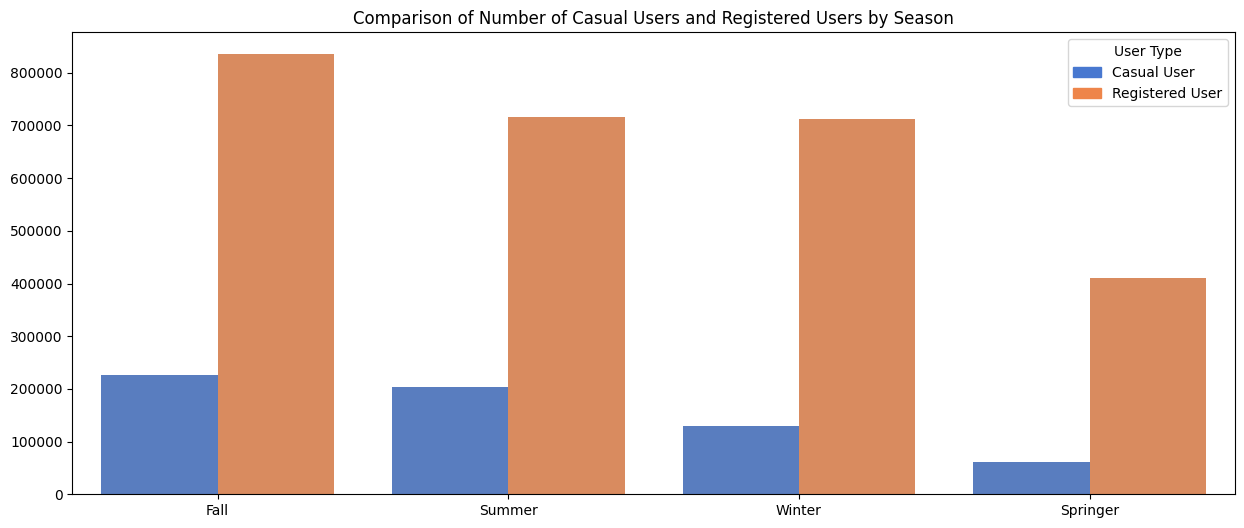

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x="season", y="count", hue="type users", data=season_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Season")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

Pengguna yang sudah ter registrasi mendominasi sebagai pengguna Bike Sharing pada setiap musim, baik untuk musim Fall, Summer, Winter dan Springer. Dengan musim Fall merupakan musim yang paling diminati pengguna untuk menggunakan Bike Sharing.

## Conclusion

**Konklusi pertanyaan 1** :
Pada tahun 2011 bike sharing diminati pengguna yang terus naik dari bulan Maret hingga Juni, sedangkan pada tahun 2012bike sharing diminati pengguna yang terus naik dari bulan bulan Juli hingga September
**Konklusi pertanyaan 2** :
Secara keseluruhan, pengguna terbagi menjadi 2 kategori yaitu casual users dan registered users


In [50]:
day.to_csv('Hasil Analisis.csv',index=False)